<a href="https://colab.research.google.com/github/da-head0/cs-project/blob/main/Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 전처리

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/da-head0/cs-project/main/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
del df['Rank']

In [6]:
# Categorical Data
cat_df = df[['Name',	'Platform',	'Year',	'Genre',	'Publisher']]

In [7]:
# Continuous Data
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

In [8]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
#기존 Year열 데이터를 바탕으로 NaN값을 채워줌

df.Year = df.Year.interpolate(method='pad', limit=2)
df.Year = df.Year.interpolate(method='pad', limit=2) #끝에 값이 있는지 2번 돌려야 함

In [11]:
#Year 행 정수로 변환

df = df.astype({'Year': 'int'}) 

In [12]:
df.groupby(by='Year').count().head(60)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,
1980,9,9,9,9,9,9,9,9,9
1981,46,46,46,46,46,46,46,46,46
1982,36,36,36,36,36,36,36,36,36
1983,17,17,17,17,17,17,17,17,17
1984,14,14,14,14,14,14,14,14,14
1985,14,14,14,14,14,14,14,14,14
1986,21,21,21,21,21,21,21,21,21
1987,16,16,16,16,16,16,16,16,16
1988,15,15,15,15,15,15,15,15,15


자료는 1980년부터 2020년까지 있지만, 2017년 출시된 게임은 3개, 2020년에 출시된 게임은 1개 있다는 것에 유의한다.

In [13]:
df.groupby(by='Platform').count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,
2600,133,133,133,133,133,133,133,133,133
3DO,3,3,3,3,3,3,3,3,3
3DS,509,509,509,507,509,509,509,509,509
DC,52,52,52,52,52,52,52,52,52
DS,2163,2163,2163,2156,2163,2163,2163,2163,2163
GB,98,98,98,98,98,98,98,98,98
GBA,822,822,822,796,822,822,822,822,822
GC,556,556,556,556,556,556,556,556,556
GEN,27,27,27,27,27,27,27,27,27


2600은 Atari 2600을 말하는 거 같다. 1977년 10월 발매된 가정용 게임기로 마이크로프로세서와 카트리지 방식을 사용하였다고.

In [14]:
#세일즈 매출에 대한 합계, 평균 계산하기
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

df['Sales_Sum'] = df['NA_Sales']+df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Sales_Mean'] = df['Sales_Sum']/4

In [15]:
df = df.dropna(axis=0) #결측치 들어간 행 제거, 100개 정도

In [16]:
df.shape

(16540, 12)

In [17]:
df = df.reset_index(drop=True) #인덱스 리셋해줌

In [18]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,8.9575
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,7.8450
...,...,...,...,...,...,...,...,...,...,...,...,...
16535,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,0.0025
16536,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,0.0025
16537,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,0.0000
16538,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,0.0025


In [19]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,2006.406046,0.265079,0.146883,0.077998,0.048191,0.538426,0.538152,0.134538
std,5.825863,0.817929,0.506129,0.309800,0.188879,1.557424,1.557546,0.389386
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.060000,0.015000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.170000,0.042500
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,0.480000,0.120000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,82.740000,20.685000


게임 데이터셋의 피쳐별 정보를 볼 수 있다. 
표준편차는 매출의 합계와, 북미 매출에서 가장 크다. 

# 지역에 따라서 선호하는 게임 장르가 다를까?


## One-Sample T-Test
[표본집단의 평균, 특정한 값]

4곳의 지역이 있으니, 각각의 지역에서 전 세계 매출의 1/4씩 나올 것이라 가정하였다.

* 귀무가설 : 지역별 매출은 각각 전세계 매출액의 1/4일 것이다
* 대립가설 : 지역별 매출은 각각 전세계 매출액의 1/4가 아닐 것이다


In [20]:
sales_df.sum()

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

In [21]:
df1 = df[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']] #장르, 매출만 모아서 1번 문제 df 생성
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Sports,41.49,29.02,3.77,8.46
1,Platform,29.08,3.58,6.81,0.77
2,Racing,15.85,12.88,3.79,3.31
3,Sports,15.75,11.01,3.28,2.96
4,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16535,Platform,0.01,0.00,0.00,0.00
16536,Shooter,0.01,0.00,0.00,0.00
16537,Racing,0.00,0.00,0.00,0.00
16538,Puzzle,0.00,0.01,0.00,0.00


## Two-Sample T-Test
[표본집단 A와 표본집단 B]

1. Adventure와 Racing의 평균 매출액이 같을까?
* 표본집단 A : Adventure의 평균 매출액
* 표본집단 B : Racing 평균 매출액

* 귀무가설 : 어드벤처 장르의 매출 평균은 레이싱 장르의 매출 평균과 같다

* 대립가설 : 어드벤처 장르의 매출 평균은 레이싱 장르의 매출 평균과 같지 않다

In [22]:
Adv = df1[df1.Genre=='Adventure']
Rac = df1[df1.Genre=='Racing']

In [23]:
l = list(Adv.columns[1:])
for i in l:
  tAR, pAR = stats.ttest_ind(Adv[i], Rac[i])
  print(f'Adventure-Racing : {i} 지역에 대한 결과')
  print(f't-value : {tAR:.3f} \t p-value : {pAR:.3f}') #:뒤에 .3f를 넣으면 소수점 3자리까지 출력된다

  if pAR<=0.05:
    print(f'X : p-value값이 {pAR:.3f}이므로 귀무가설 기각, 대안가설 채택\n')
  elif pAR>=0.1:
    print(f'O : p-value값이 {pAR:.3f}이므로 대안가설 기각, 귀무가설 채택\n')
  else:
    print(f'△ : p-value값이 {pAR:.3f}이므로 애매하다\n')

Adventure-Racing : NA_Sales 지역에 대한 결과
t-value : -9.277 	 p-value : 0.000
X : p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택

Adventure-Racing : EU_Sales 지역에 대한 결과
t-value : -8.300 	 p-value : 0.000
X : p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택

Adventure-Racing : JP_Sales 지역에 대한 결과
t-value : -0.595 	 p-value : 0.552
O : p-value값이 0.552이므로 대안가설 기각, 귀무가설 채택

Adventure-Racing : Other_Sales 지역에 대한 결과
t-value : -6.354 	 p-value : 0.000
X : p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택



#지역별- 장르별 매출 순위

In [24]:
df1genresum = df1.groupby(by='Genre').sum() #지역별로 장르별 매출 합계
df1genresum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.54,524.92,159.49,187.35
Adventure,105.67,64.08,51.99,16.81
Fighting,221.92,100.22,87.35,36.24
Misc,404.67,213.93,107.72,75.22
Platform,447.05,201.13,130.77,51.59
Puzzle,123.78,50.77,57.31,12.55
Racing,359.42,238.38,56.69,77.27
Role-Playing,327.28,188.05,352.26,59.61
Shooter,582.59,313.24,38.28,102.69


In [25]:
# 장르별 순위 매기기
rank_by_sales = pd.DataFrame()
rank_by_sales['NA'] = df1genresum['NA_Sales'].rank(ascending=False)
rank_by_sales['JP'] = df1genresum['JP_Sales'].rank(ascending=False)
rank_by_sales['EU'] = df1genresum['EU_Sales'].rank(ascending=False)
rank_by_sales['Other'] = df1genresum['Other_Sales'].rank(ascending=False)
rank_by_sales.sort_values(by='NA')

,NA,JP,EU,Other
Genre,,,,
Action,1.0,2.0,1.0,1.0
Sports,2.0,3.0,2.0,2.0
Shooter,3.0,12.0,3.0,3.0
Platform,4.0,4.0,6.0,7.0
Misc,5.0,5.0,5.0,5.0
Racing,6.0,9.0,4.0,4.0
Role-Playing,7.0,1.0,7.0,6.0
Fighting,8.0,6.0,9.0,8.0
Simulation,9.0,7.0,8.0,9.0


지역별 장르의 매출 순위이다. 

#지역별 - 게임 장르별 매출 합계 그래프

([<matplotlib.patches.Wedge at 0x7f6026ac2748>,
 [Text(-1.0997006136087835, 0.025662432239859062, 'NA_Sales'),
  Text(0.7973254757637517, -0.7578074199281156, 'EU_Sales'),
  Text(0.9361585062553668, 0.5775874402769857, 'JP_Sales'),
  Text(0.3053940572619019, 1.0567565801967425, 'Other_Sales')],
 [Text(-0.5998366983320637, 0.013997690312650395, '49.3%'),
  Text(0.4349048049620463, -0.4133495017789721, '27.3%'),
  Text(0.5106319125029273, 0.3150476946965376, '14.5%'),
  Text(0.16657857668831008, 0.5764126801073141, '9.0%')])

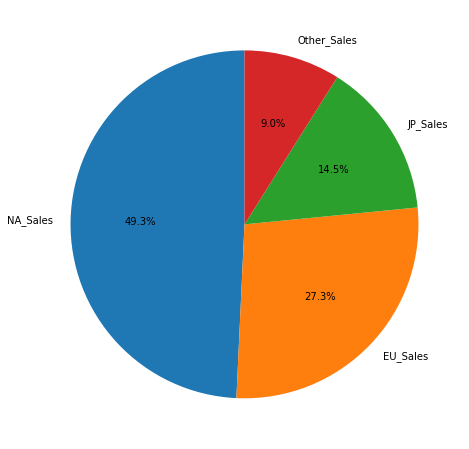

In [26]:
# 지역별 매출 총합 파이차트
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

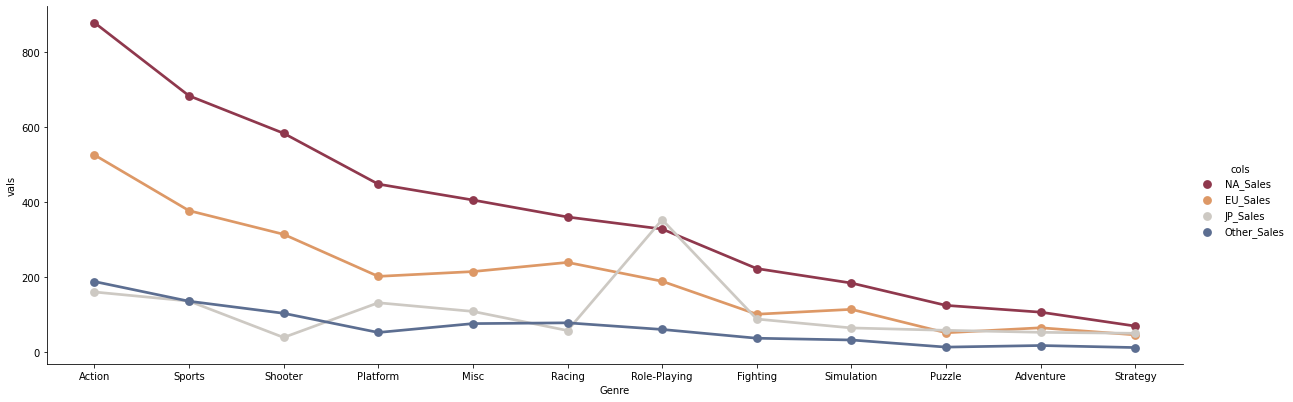

In [27]:
# 지역별 - 게임 장르별 매출 합계 그래프

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) #북미지역 매출 순위로 정렬
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#dd9866", "NA_Sales":"#8f384d", "Other_Sales":"#5c6e91", "JP_Sales":"#cdc9c3"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

👉 북미지역은 가장 매출이 높은 지역이다. 북미 지역의 매출 순위로 다른 지역들의 매출을 그려 보면, 북미와 유럽, 다른 지역의 장르별 매출액 그래프는 유사한 라인을 그리는 것을 볼 수 있다.

👉 유럽지역의 경우 1-3위는 북미와 같지만, 레이싱 게임이 플랫폼 게임보다 인기있다는 점이 북미와 다르다. (기타지역에서도 레이싱 게임은 4위다.)


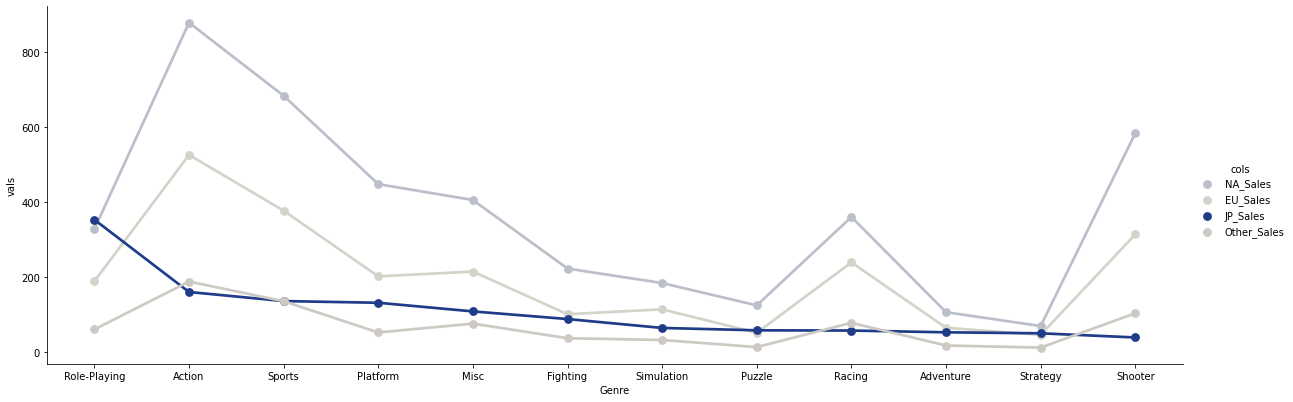

In [28]:
df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) #일본지역 매출 순위로 정렬
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#d2d3c9", "NA_Sales":"#bbbfca", "Other_Sales":"#cdc9c3", "JP_Sales":"#1f3c88"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

일본 지역을 기준으로 장르별 매출을 재정렬했다.

In [29]:
rank_by_sales.sort_values(by='JP') # 장르별 매출 순위 - 일본 기준

,NA,JP,EU,Other
Genre,,,,
Role-Playing,7.0,1.0,7.0,6.0
Action,1.0,2.0,1.0,1.0
Sports,2.0,3.0,2.0,2.0
Platform,4.0,4.0,6.0,7.0
Misc,5.0,5.0,5.0,5.0
Fighting,8.0,6.0,9.0,8.0
Simulation,9.0,7.0,8.0,9.0
Puzzle,10.0,8.0,11.0,11.0
Racing,6.0,9.0,4.0,4.0


👉 일본의 경우 북미, 유럽과 다르게 롤플레잉 게임이 가장 인기가 많다. 북미, 유럽의 경우 액션 게임이 1위로 매출이 다른 장르보다 두드러지만 압도적이지는 않은 반면, 일본의 롤플레잉 게임 매출은 2위인 액션 게임 매출과 2배 이상의 차이를 보인다. 

흥미로운 점은 북미, 유럽에서 인기있던 사격(Shooter) 게임의 경우 일본에서 가장 인기없는 장르에 속한다. 

레이싱 게임의 경우 다른 지역에서는 매출 4-6위인 반면, 일본에서는 9위로 인기 있는 편이 아니다.

반면 일본을 제외한 다른 지역에서 가장 인기 없는 장르는 전략(Strategy)이다.

# 지역별 매출 그래프 상세

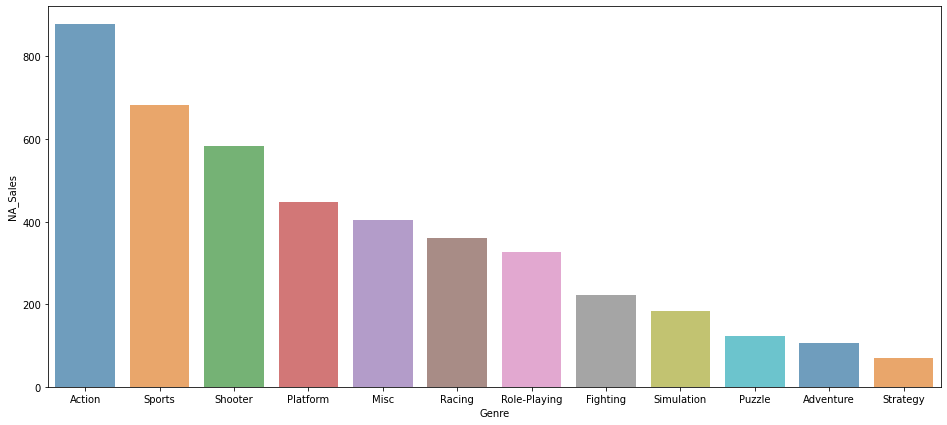

In [30]:
#북미지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="NA_Sales", palette="tab10", alpha=.7);

👉 북미지역은 가장 매출이 높은 지역이다. 
액션, 스포츠, 사격, 플랫폼 게임이 강세를 보인다. 

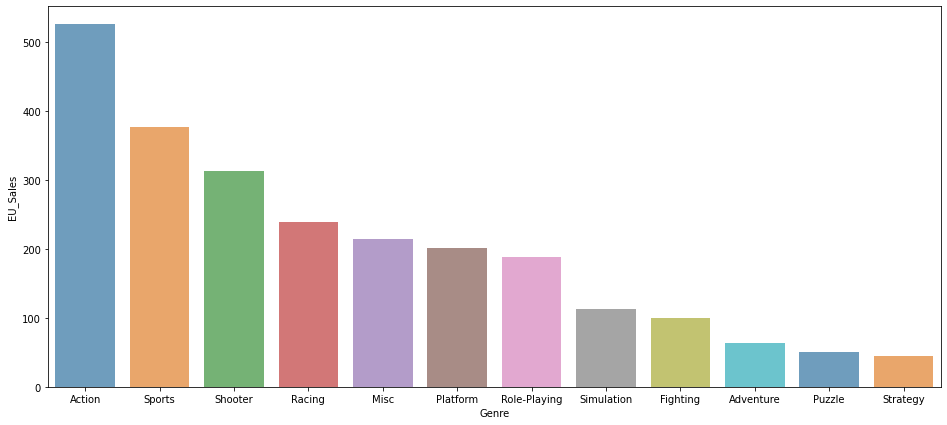

In [31]:
#유럽지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='EU_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="EU_Sales", palette="tab10", alpha=.7);

👉 유럽지역의 경우 1-3위는 북미와 같지만, 레이싱 게임이 플랫폼 게임보다 인기있다는 점이 북미와 다르다.



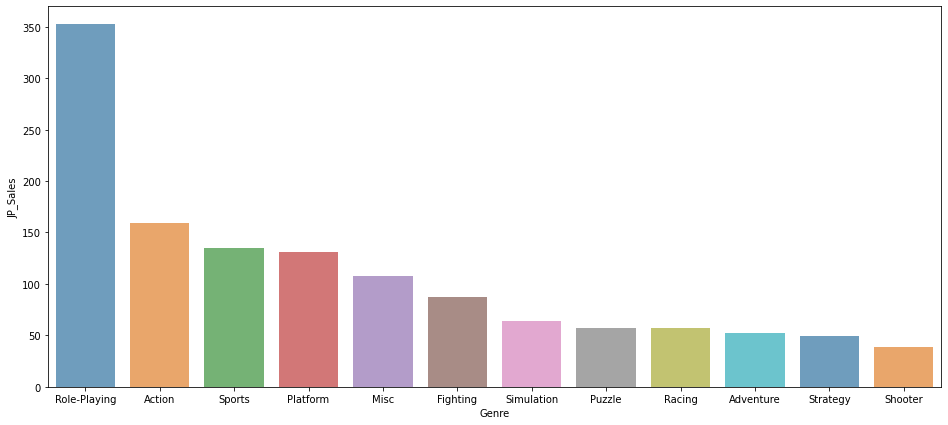

In [32]:
#일본 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="JP_Sales", palette="tab10", alpha=.7);

👉 일본의 경우 북미, 유럽과 다르게 롤플레잉 게임이 가장 인기가 많다. 북미, 유럽의 경우 액션 게임이 1위로 매출이 다른 장르보다 두드러지만 압도적이지는 않은 반면, 일본의 롤플레잉 게임 매출은 2위인 액션 게임 매출과 2배 이상의 차이를 보인다. 

흥미로운 점은 북미, 유럽에서 인기있던 사격(Shooter) 게임의 경우 일본에서 가장 인기없는 장르에 속한다.

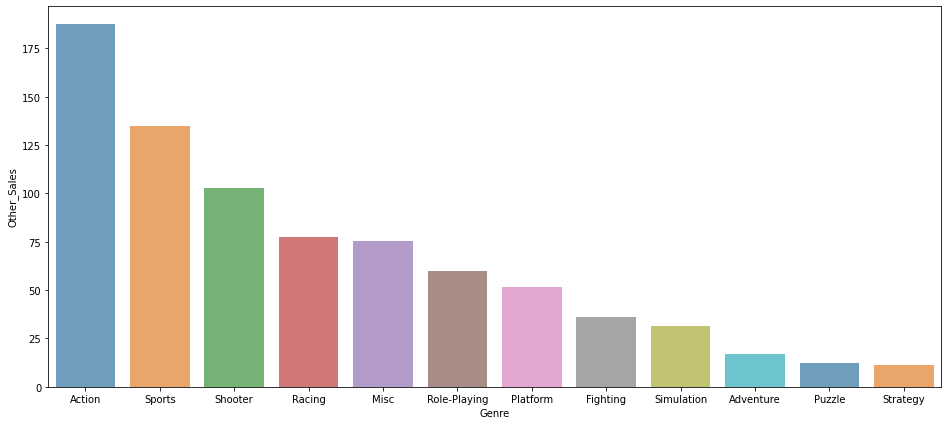

In [33]:
#기타지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='Other_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="Other_Sales", palette="tab10", alpha=.7);

# 연도별 게임의 트렌드가 있을까?

In [34]:
# 총매출 순위별로 정렬한 df 만들기

df2 = df.sort_values(by='Sales_Sum', ascending=False)[['Name',	'Platform',	'Year',	'Genre',	'Publisher', 'Sales_Sum']].reset_index()
del df2['index']
df2

,Name,Platform,Year,Genre,Publisher,Sales_Sum
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
...,...,...,...,...,...,...
16535,East India Company,PC,2009,Strategy,Paradox Interactive,0.01
16536,World Poker Tour,GBA,2005,Misc,Take-Two Interactive,0.01
16537,Sousaku Alice to Oujisama!,3DS,2015,Simulation,Happinet,0.01
16538,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01


In [35]:
yearcount = df2.groupby(by="Year").Name.count() #연도별 출시된 게임 숫자

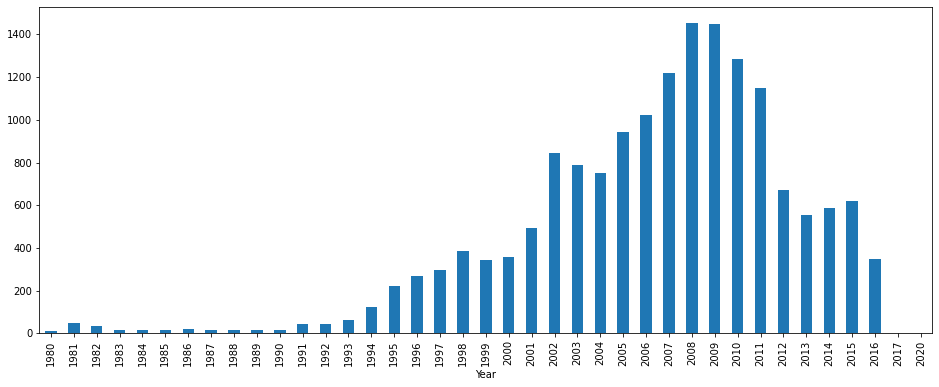

In [36]:
yearcount.plot(kind='bar', figsize=(16, 6));

94년도부터 한 해 출시되는 게임은 100개가 넘어, 2008-2009년에는 출시된 게임의 수가 가장 많았다. 2009년 이후부터는 하락세를 보인다.


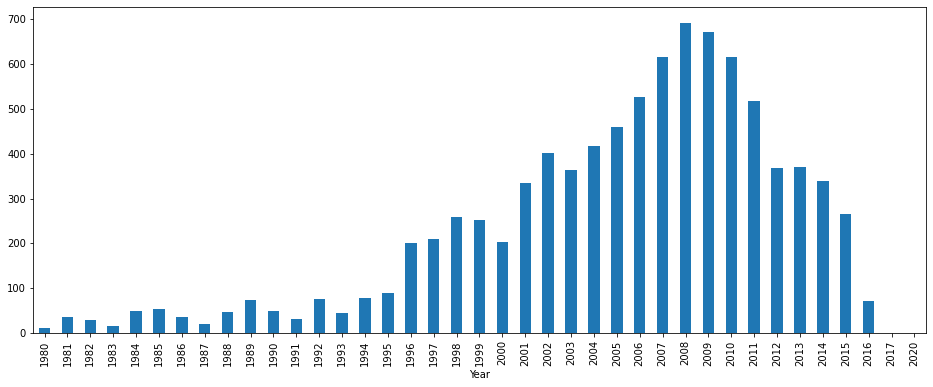

In [37]:
#연도별 게임 산업 매출 총액(모든 지역)

yearsales = df2.groupby(by="Year").Sales_Sum.sum()
yearsales.plot(kind='bar', figsize=(16, 6));

연도별 게임의 판매 총액 그래프다. 역시 2008-2009년이 매출이 가장 높아, 게임의 전성기였다는 것을 알 수 있다. 2008년 이후 하락세를 보인다. 

연도별 출시 게임 수는 1991년 이후 증가했는데, 그 전까지 게임의 매출은 들쭉날쭉했지만 어느정도 수요가 있었다. 1991년 이후,  발매되는 게임 수 증가와 더불어 매출 역시 비슷한 그래프를 그리며 늘었다.

흥미로운 점은 2013-2015년에 연도별 출시되는 게임의 수는 늘었지만, 게임의 매출은 계속 하락했다는 것이다. 

## 연도별 발매된 게임 장르 수 계산

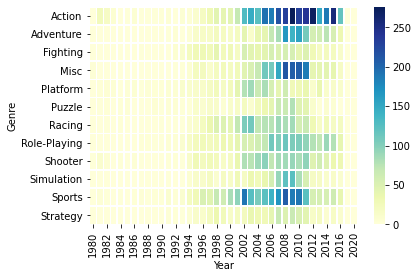

In [38]:
GY = pd.crosstab(df['Genre'], df['Year']) #margins는 subtotal을 더함. All을 만들어줌.
ax = sns.heatmap(GY, linewidths=.5, cmap='YlGnBu');

## 연도별 발매된 게임의 총 매출 그래프

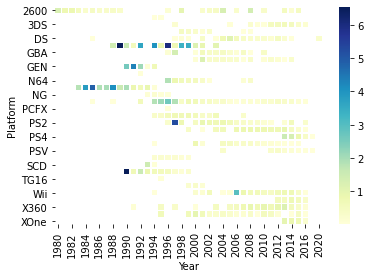

In [39]:
year_Pl = pd.pivot_table(df, index='Platform', columns='Year', values='Sales_Sum')
# 총매출 히트맵 구할 때는 피봇테이블 
ax = sns.heatmap(year_Pl, linewidths=.5, cmap='YlGnBu');

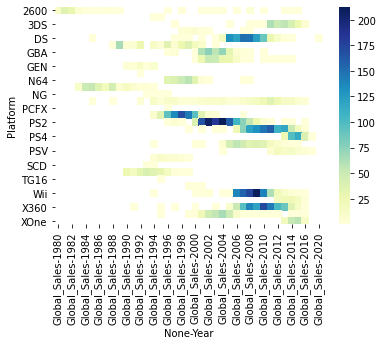

In [40]:
GPG = pd.DataFrame(df.groupby(by=['Platform','Year']).Global_Sales.sum())
GPG = GPG.unstack(level=-1) #두번째 인덱스를 칼럼화
ax = sns.heatmap(GPG, cmap='YlGnBu');

In [41]:
GYG = pd.DataFrame(df.groupby(by=['Genre','Year']).Global_Sales.sum())
GYG = GYG.unstack(level=-1) #두번째 인덱스를 칼럼화

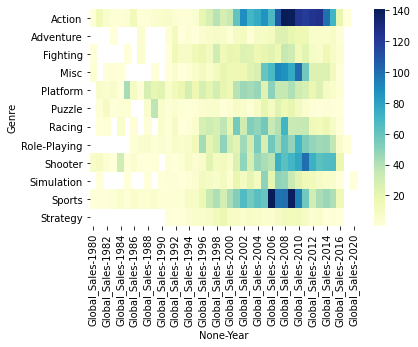

In [42]:
ax = sns.heatmap(GYG, cmap='YlGnBu');

연도별로 장르의 매출을 한눈에 볼 수 있다.

가장 매출이 많은 장르는 액션이고, 그 다음이 스포츠이다. 

최근까지 꾸준히 매출이 나오는 장르는 액션과 사격, 스포츠이다.

In [88]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,8.9575
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,7.8450
...,...,...,...,...,...,...,...,...,...,...,...,...
16535,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,0.0025
16536,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,0.0025
16537,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,0.0000
16538,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,0.0025


In [ ]:
GYG

In [99]:
args=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
fig = px.scatter(df, x="Genre", y="Platform", animation_frame="Year", animation_group="Genre",
           size="Sales_Sum", hover_name="Genre")
fig.show()
#facet_col 하면 지역별로도 될거같은데....


### 최근 장르, 플랫폼 트렌드

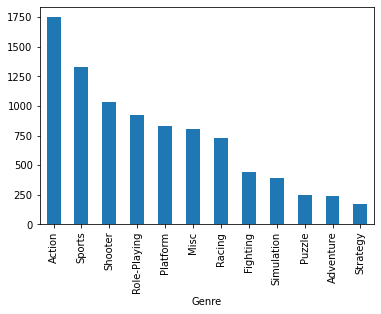

In [43]:
genre_sales_sum = df.groupby(by=["Genre"]).Sales_Sum.sum().sort_values(ascending=False) #장르별 매출 총액
genre_sales_sum.plot(kind='bar'); #단위 : B

먼저 장르별로 매출 총액을 비교.

y축의 단위는 B이다. 액션 게임>스포츠>슈터>롤플레잉 순으로 매출이 높았는데,
롤플레잉의 경우 일본을 타깃으로 해야 하고(하지만 북미 매출과 얼마 차이나지 않는다) 

액션은 연도별 매출 그래프를 보면 최근에도 매출이 높았다. 

In [44]:
genre_sales_sum

Genre
Action          1749.30
Sports          1328.96
Shooter         1036.80
Role-Playing     927.20
Platform         830.54
Misc             801.54
Racing           731.76
Fighting         445.73
Simulation       391.67
Puzzle           244.41
Adventure        238.55
Strategy         174.57
Name: Sales_Sum, dtype: float64

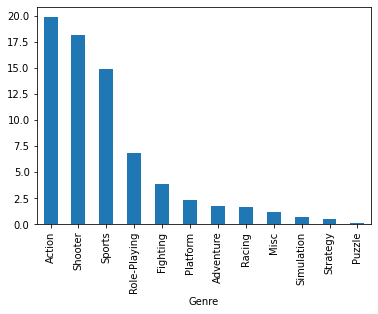

In [45]:
# 2016년 이후 장르별 매출
df2[df2['Year'] >=2016].groupby(by=["Genre"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

최근 5년간 장르별 매출을 봐도 액션이 우세하다. 요새는 스포츠보다 사격 게임이 잘 팔린다.

장르는 액션 / 사격이 좋겠다.

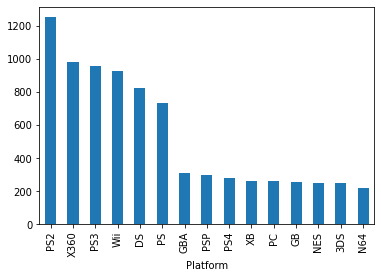

In [46]:
# 가장 매출 총액이 높은 플랫폼 탑 15
df.groupby(by=["Platform"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

의외로 PC 게임의 매출이 높지 않다.
PS2의 매출은 역대 최대지만, 2012년 단종되었다. 게임 시장의 전성기인 2008-2009년의 수혜를 입어, 다른 플랫폼들이 PS2의 매출을 넘지 못했다. 

엑스박스360도 단종되었다.

현재에도 단종되지 않고 게임이 잘 팔리는 플랫폼을 타깃으로 해야 한다. 

하지만 대부분 단종되어서 최근 플랫폼별 매출을 볼 필요가 있다.

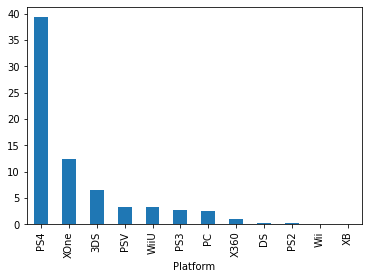

In [47]:
#2016년 이후 매출 총액이 높은 플랫폼 탑
df2[df2['Year'] >=2016].groupby(by=["Platform"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

데이터셋에 2017년 이후 자료가 거의 없어서 최근 자료가 필요하다.

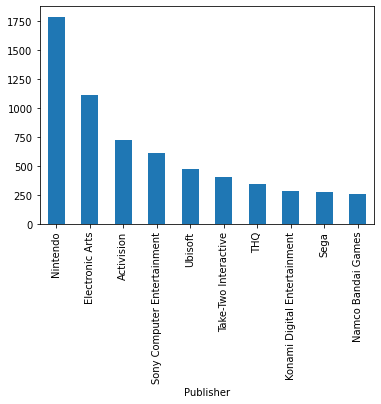

In [48]:
# 퍼블리셔 매출 총액 top 10
df.groupby(by=["Publisher"]).Sales_Sum.sum().sort_values(ascending=False).head(10).plot(kind='bar');

전 연도에서 퍼블리셔별 매출 1위는 닌텐도다. 

그렇지만 바로 닌텐도와 손잡으면 되겠다는 결론은 곤란하다.

최근 데이터를 봐야 한다.

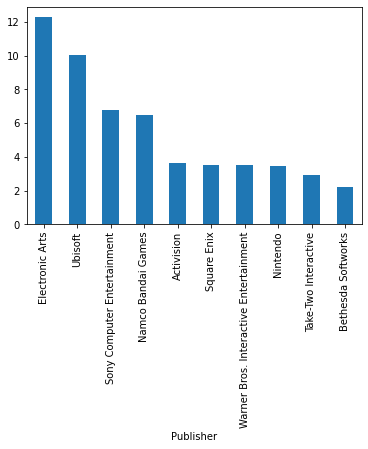

In [49]:
#최근 5년 기준 매출 총액이 높은 퍼블리셔
df2[df2['Year'] >=2016].groupby(by=["Publisher"]).Sales_Sum.sum().sort_values(ascending=False).head(10).plot(kind='bar');

2016년 이후 퍼블리셔별 매출 1위는 EA다. 닌텐도는 중위권쯤 된다.

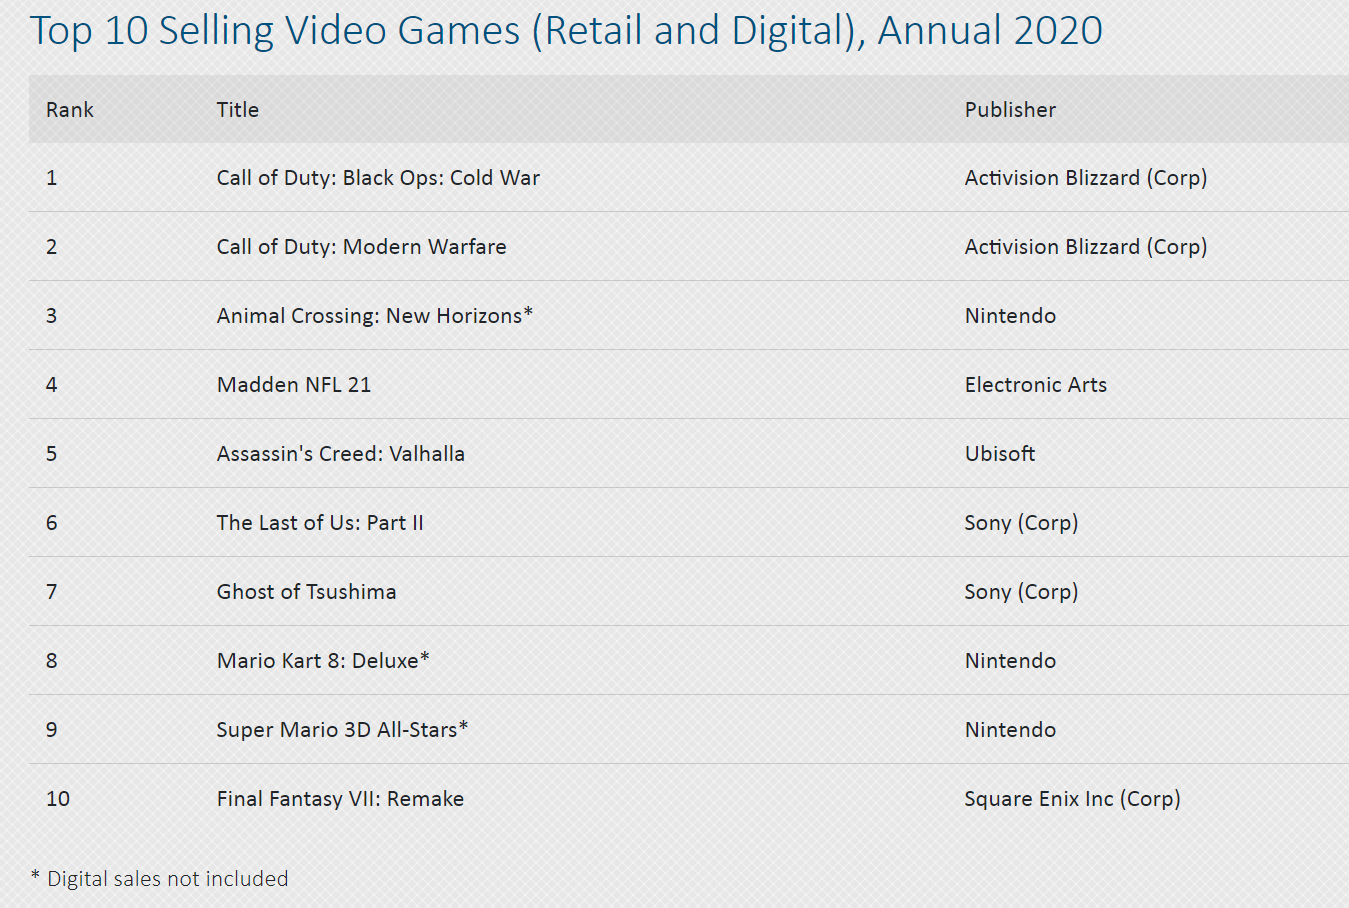

Source : https://www.npd.com/wps/portal/npd/us/news/top-10/video-games/

2020년의 매출 상위 10위 게임을 보면 블리자드, Electronic Arts, Ubisoft, Sony의 실적이 더 좋다. 굳이 닌텐도와 손잡을 필요는 없겠다. 

매출 상위권은 7위인 고스트 오브 쓰시마(신규 IP)를 제외하고 다 시리즈 프랜차이즈 게임이다. 

다들 시리즈를 우려먹고 있다. 안전해서일까? 

2020년에는 콜 오브 듀티의 매출이 가장 좋았다. 그렇다고 내년에 콜오브 듀티 게임을 또 낸다고 매출이 보장되지 않는다.

게임 데이터셋의 게임명을 분석해, 어떤 프랜차이즈/게임이 가장 인기있는지 보자.

### 연도별 플랫폼 매출 비교

In [50]:
df.groupby(by=["Year",'Platform']).count()

Name  Genre  Publisher  ...  Global_Sales  Sales_Sum  Sales_Mean
Year Platform                          ...                                     
1980 2600         9      9          9  ...             9          9           9
1981 2600        46     46         46  ...            46         46          46
1982 2600        36     36         36  ...            36         36          36
1983 2600        11     11         11  ...            11         11          11
     NES          6      6          6  ...             6          6           6
...             ...    ...        ...  ...           ...        ...         ...
2016 XB           1      1          1  ...             1          1           1
     XOne        54     54         54  ...            54         54          54
2017 PS4          1      1          1  ...             1          1           1
     PSV          2      2          2  ...             2          2           2
2020 DS           1      1          1  ...             1          1           1

[313 rows x 10 columns]

In [51]:
large_df = df[df['Platform'].str.contains('PS2|DS|PS3|Wii|X360|PSP|PS|PC|XB|GBA|GC|3DS|PSV|PS4')] #300개 이하 플랫폼 제외
large_df = large_df[large_df['Platform'] !='PCFX']

In [52]:
large_df.groupby(by=['Platform']).count().sort_values(by="Name", ascending=False)

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
Platform,,,,,,,,,,,
PS2,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
DS,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
PS3,1326,1326,1326,1326,1326,1326,1326,1326,1326,1326,1326
Wii,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324
X360,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261
PSP,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
PS,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193
PC,954,954,954,954,954,954,954,954,954,954,954
XB,824,824,824,824,824,824,824,824,824,824,824


## DS의 평균 매출액이 PS2의 평균 매출액과 같을까?

PS2는 총 2159개, 

DS는 2156개의 게임이 발매되었다.

두 플랫폼의 매출액이 같은지 two-sample t-test를 시행하여 확인하겠다.

* 귀무가설 : DS 플랫폼의 평균 매출액과 PS2 플랫폼의 평균 매출액은 같다

* 대립가설 : DS 플랫폼의 평균 매출액과 PS2 플랫폼의 평균 매출액은 같지 않다

In [53]:
df_p = df[['Platform', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
DS = df_p[df_p.Platform=='DS']
PS2 = df_p[df_p.Platform=='PS2']

In [54]:
l = list(DS.columns[1:])
for i in l:
  tDS, pDS = stats.ttest_ind(DS[i], PS2[i])
  print(f'DS-PS2 : {i} 지역에 대한 결과')
  print(f't-value : {tDS:.3f} \t p-value : {pDS}') #:뒤에 .3f를 넣으면 소수점 3자리까지 출력된다

  if pDS<=0.05:
    print(f'X : p-value값이 {pDS:.3f}이므로 귀무가설 기각, 대안가설 채택\n')
  elif pDS>=0.1:
    print(f'O : p-value값이 {pDS:.3f}이므로 대안가설 기각, 귀무가설 채택\n')
  else:
    print(f'△ : p-value값이 {pDS:.3f}이므로 애매하다\n')

DS-PS2 : NA_Sales 지역에 대한 결과
t-value : -5.192 	 p-value : 2.1752043966753066e-07
X : p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택

DS-PS2 : EU_Sales 지역에 대한 결과
t-value : -5.006 	 p-value : 5.765791489625328e-07
X : p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택

DS-PS2 : JP_Sales 지역에 대한 결과
t-value : 1.782 	 p-value : 0.07479114324104595
△ : p-value값이 0.075이므로 애매하다

DS-PS2 : Other_Sales 지역에 대한 결과
t-value : -7.853 	 p-value : 5.083259037942372e-15
X : p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택



일본 지역을 제외하면 DS와 PS2의 평균 매출액은 차이가 있다.

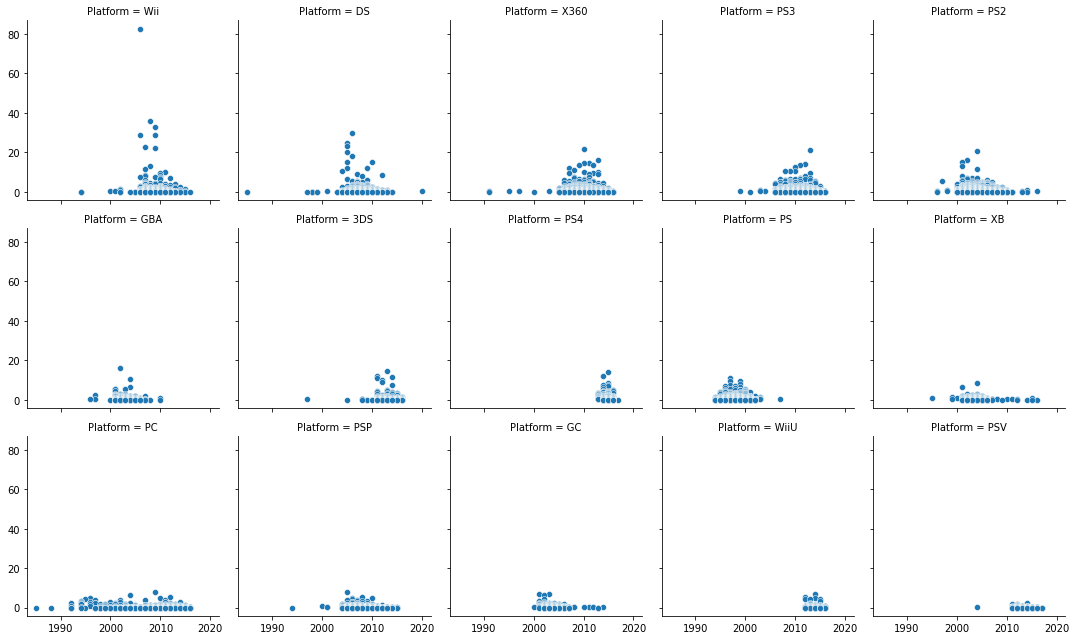

In [55]:
# 플랫폼별 연도별 총매출
g = sns.FacetGrid(data=large_df, col='Platform', col_wrap=5)

g.map_dataframe(
    sns.scatterplot,
    x='Year',  y='Sales_Sum',
    data = large_df
)
g.add_legend();

Wii에서 매출 1위 게임이 나왔다. DS도 히트한 게임을 어느정도 냈다.

GC, 3DS는 2000년 이후, 

WiiU, PS5는 2010년 이후 출시된 플랫폼이다.

각 그래프는 해당 플랫폼의 연도별 매출이다.
게임이 히트한 경우는 y축 위치가 높은 아웃라이어이다. Wii의 경우 총매출 80M를 넘긴 아웃라이어가 발생했다. 1위게임인 닌텐도 Wii Sports다. 닌텐도는 퍼블리셔 중 매출 1위인데, 역대 매출 탑 20위를 뽑아보면 16-18위를 제외하고 다 닌텐도에서 발매한 게임이다. 퍼블리셔가 닌텐도가 아닌 경우는 외에 Grand Theft Auto 시리즈가 매출 탑 25위중 하위권 4개에 든 경우가 있었다.


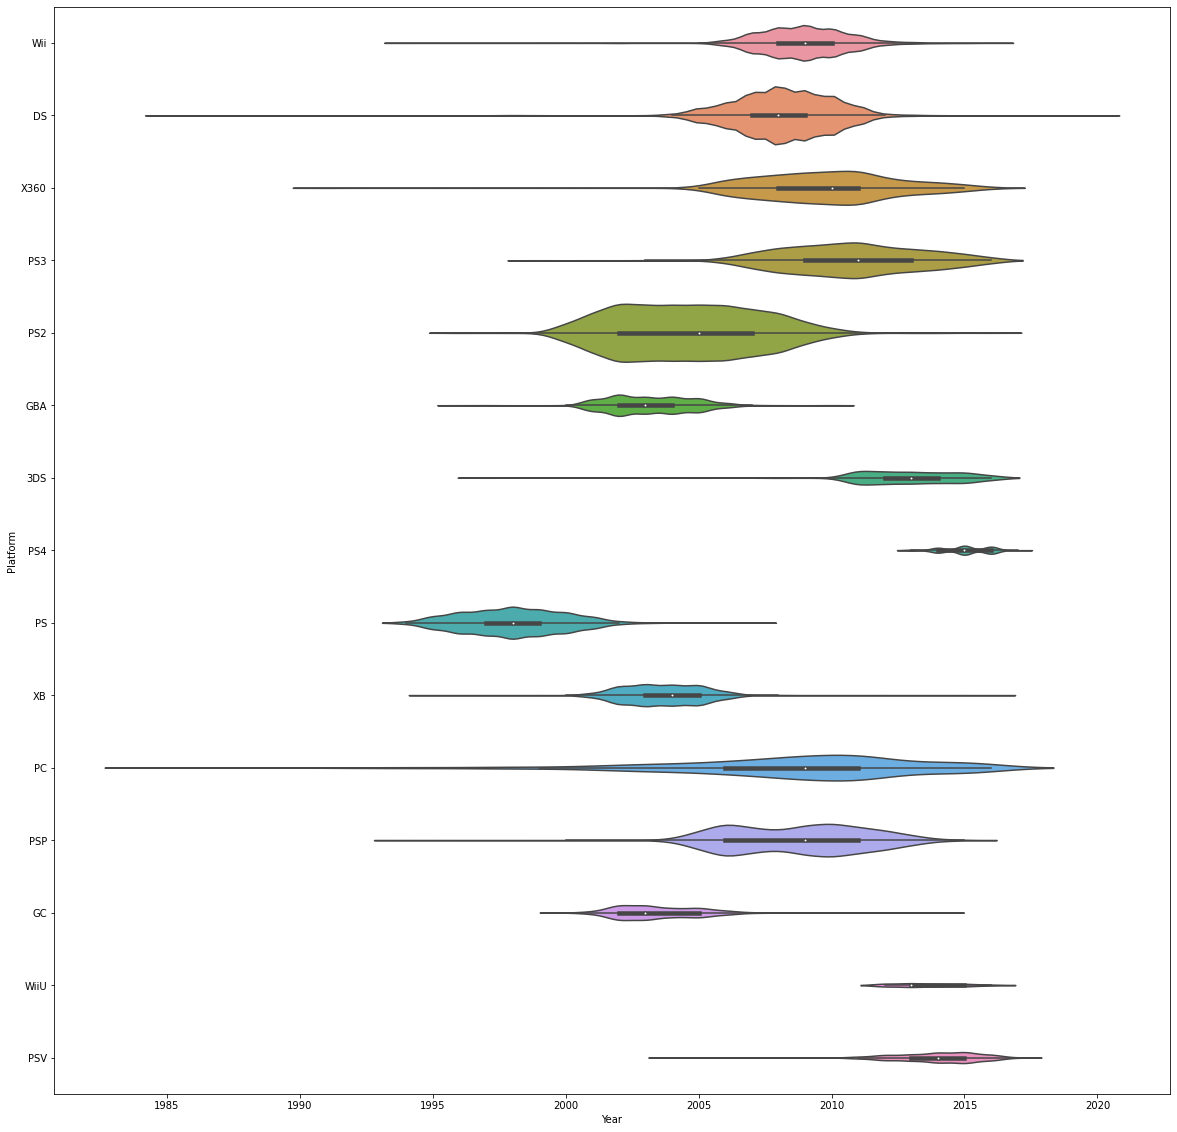

In [56]:
plt.figure(figsize=(20, 20))
sns.violinplot(data = large_df, x='Year', y='Platform', scale="count");

플랫폼별로 발매된 게임의 숫자의 연도별 바이올린플롯이다.

게임의 숫자라 매출과 비례하지는 않는다.

## One-Sample Chi-Test
[표본집단 A의 분포, 나의 예측]

수많은 게임들이 플랫폼을 이용해 즐길 수 있다. 따라서 플랫폼마다 다양하게 게임을 즐길 수 있도록 다양한 장르의 게임이 출시가 되었을 것이다.


* 귀무가설 : 플랫폼의 게임 장르별 분포는 고를 것이다

* 대립가설 : 플랫폼의 게임 장르별 분포는 고르지 않을 것이다.

In [57]:
GenrePlatform = pd.crosstab(cat_df['Genre'], cat_df['Platform'])  # computes a frequency table of the factors
GenrePlatform 

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,38,13,0,165,0,157,348,380,122,222,142,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,4,1,0,65,0,69,196,74,19,213,86,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,29,4,11,6,0,108,150,76,17,74,16,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,18,2,0,24,0,76,222,124,15,106,24,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,30,28,0,11,0,64,103,37,11,36,10,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,12,14,0,25,0,32,18,3,1,44,3,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,57,4,0,60,0,145,216,92,17,65,11,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,8,11,0,104,1,97,187,119,47,192,83,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,24,7,0,148,0,96,160,156,34,37,5,22,0,10,1,0,66,10,203,132,33


In [58]:
from scipy.stats import chisquare
l = list(GenrePlatform)
evenlist = []
for i in l:
  print(f'플랫폼 : {i}')
  x, p = chisquare(GenrePlatform[i], axis=None)
  print(f'chi:{x:.3f}\n p-value:{p:.3f}')
  if p>=0.05:
    print(f'O : 귀무가설을 기각할 수 없다. {i}의 {list(GenrePlatform.index)}는 고르게 분포했을 것이다')
    evenlist.append(i)
  else :
    print(f'X : 귀무가설을 기각한다. {i}의 {list(GenrePlatform.index)}는 고르지 않게 분포했을 것이다')
  print('====================================================================\n')
  
print(f'플랫폼 {evenlist}에서는 장르별로 게임이 고르게 출시되어 있다.')
print('위 플랫폼들의 분포는 기대와 동일하다 - 귀무가설 채택, 대립가설 기각')

플랫폼 : 2600
chi:292.233
 p-value:0.000
X : 귀무가설을 기각한다. 2600의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르지 않게 분포했을 것이다

플랫폼 : 3DO
chi:9.000
 p-value:0.622
O : 귀무가설을 기각할 수 없다. 3DO의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르게 분포했을 것이다

플랫폼 : 3DS
chi:623.786
 p-value:0.000
X : 귀무가설을 기각한다. 3DS의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르지 않게 분포했을 것이다

플랫폼 : DC
chi:49.538
 p-value:0.000
X : 귀무가설을 기각한다. DC의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르지 않게 분포했을 것이다

플랫폼 : DS
chi:897.888
 p-value:0.000
X : 귀무가설을 기각한다. DS의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Play

하지만 해당 플랫폼의 총합은 10도 안된다. 애초에 해당 플랫폼으로 게임이 1-3개 나왔기 때문에 데이터가 균등하게 0이다라는 뜻에서 결과가 위와 같이 나온듯. 검정도 일괄적으로 돌리면 믿을 수 없다. 특정한 걸 집어서 돌리는 게 좋겠다.

# 매출이 높은 게임에 대한 분석 및 시각화 프로세스

# 게임별 매출 순위

In [59]:
df.sort_values(by=["Sales_Sum"], ascending=False).head(25) #매출 탑 25위

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,8.9575
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,7.8450
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26,7.5650
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01,7.5025
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,29.01,7.2525
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,28.61,7.1525
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31,7.0775


매출 상위 25개 게임의 경우 이름에서 보이는 키워드로 Wii, Mario, Pokemon, Grand Theft, 등이 눈에 띈다. 

이런 키워드가 들어가는 시리즈 게임의 매출이 더 높았을까?

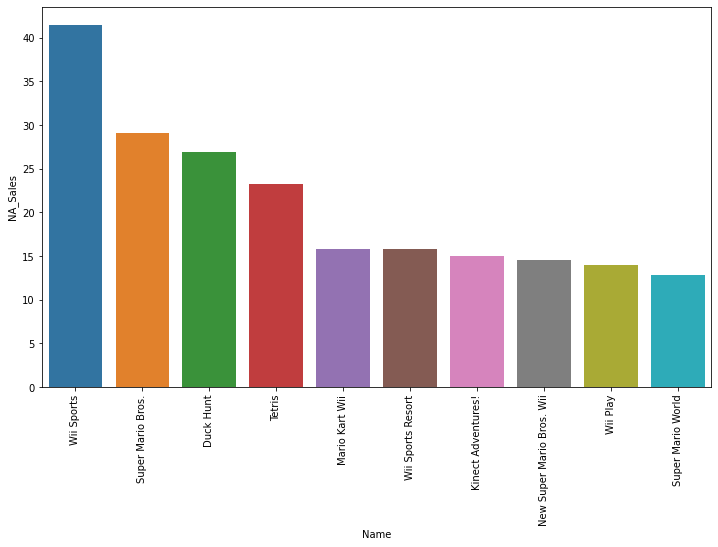

In [60]:
#북미 매출 Top10 게임
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(data = df.sort_values(by='NA_Sales', ascending=False).head(10), x = 'Name', y = 'NA_Sales');

북미 시장이 1위 매출 게임인 Wii Sports의 판매의 절반 이상을 가져갔다. 
Wii Sports와 슈퍼 마리오가 가장 잘 팔리지만, Duck Hunt, Tetris, Mario Cart 등 게임이 다양하게 팔리는 편이다.

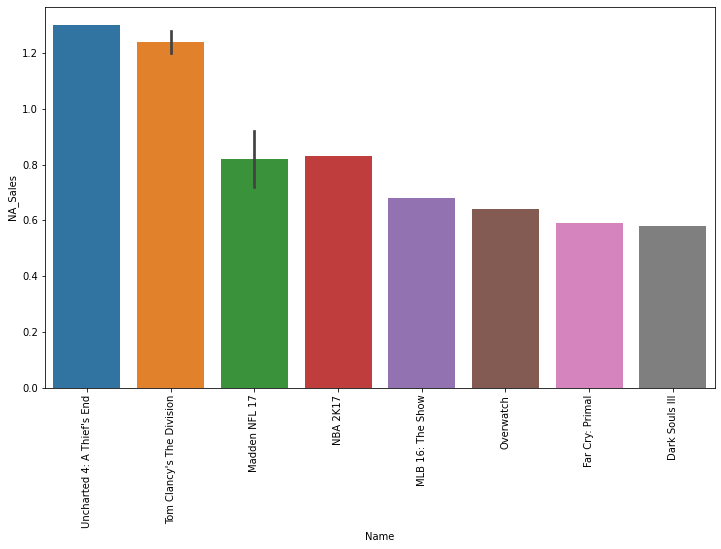

In [61]:
# 2016년 이후 출시된 게임의 북미 세일즈 top10
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(data = df[df.Year >=2016].sort_values(by='NA_Sales', ascending=False).head(10), x = 'Name', y = 'NA_Sales');

In [62]:
#위 게임의 장르
df[df.Year >=2016].sort_values(by='NA_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
271,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20,4.20,1.0500
351,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61,3.61,0.9025
844,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01,2.00,0.5000
1626,Madden NFL 17,PS4,2016,Sports,Electronic Arts,0.92,0.08,0.00,0.23,1.23,1.23,0.3075
1698,NBA 2K17,PS4,2016,Sports,Take-Two Interactive,0.83,0.14,0.00,0.22,1.19,1.19,0.2975
2501,Madden NFL 17,XOne,2016,Sports,Electronic Arts,0.72,0.02,0.00,0.09,0.82,0.83,0.2075
2453,MLB 16: The Show,PS4,2016,Action,Sony Computer Entertainment,0.68,0.00,0.00,0.16,0.84,0.84,0.2100
1025,Overwatch,PS4,2016,Shooter,Activision,0.64,0.68,0.14,0.26,1.73,1.72,0.4300
769,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13,2.14,0.5350
1188,Dark Souls III,PS4,2016,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56,1.56,0.3900


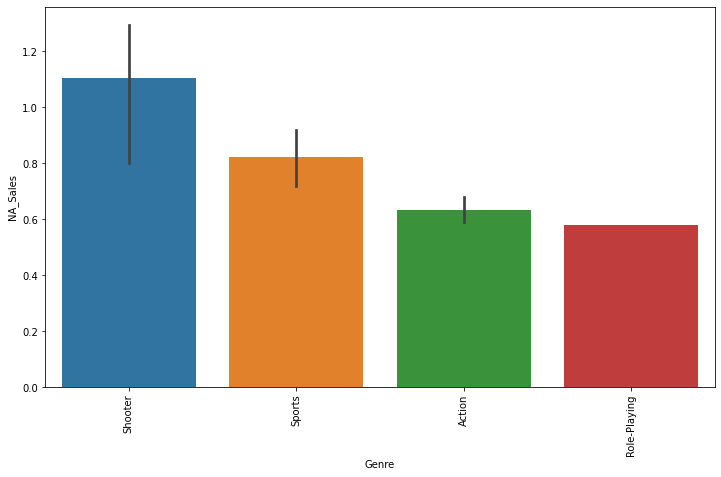

In [63]:
#2016년 이후 북미 매출 Top10 게임 장르
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(data = df[df.Year >=2016].sort_values(by='NA_Sales', ascending=False).head(10), x = 'Genre', y = 'NA_Sales');

북미애서 매출 탑 10을 찍은 게임의 장르다. 스포츠와 플랫폼 게임은 여러개라 편차가 그래프에 보인다. 스포츠와 플랫폼, 사격 게임이 탑 10 안에서 가장 잘 팔렸다. (매출 총액으로 계산하면 액션이 가장 잘 팔렸다.)

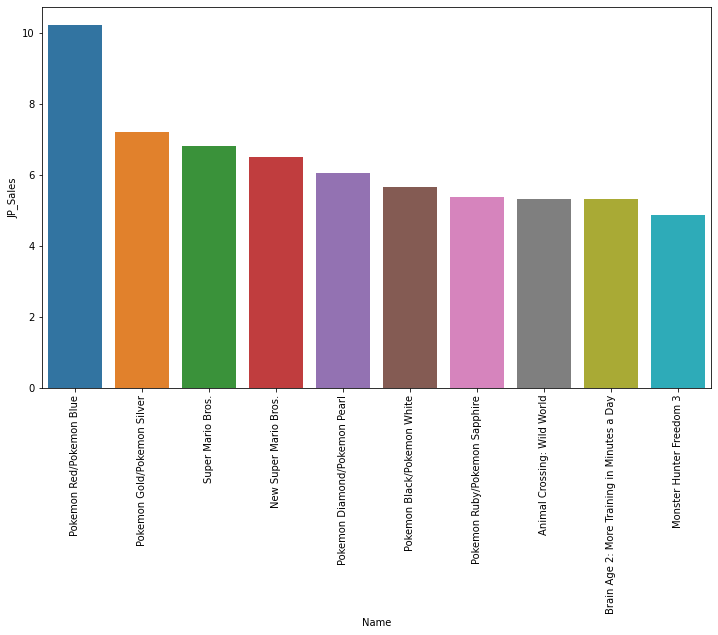

In [64]:
#일본 매출 Top10 게임
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(data = df.sort_values(by='JP_Sales', ascending=False).head(10), x = 'Name', y = 'JP_Sales');

포켓몬 시리즈가 특히 잘 팔린다. 슈퍼 마리오도 잘 팔린다.

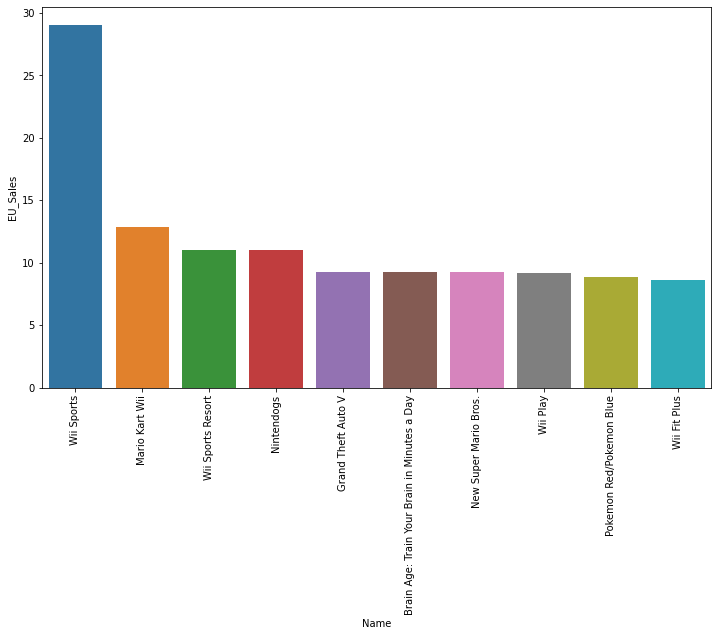

In [65]:
#유럽 매출 Top10 게임
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(data = df.sort_values(by='EU_Sales', ascending=False).head(10), x = 'Name', y = 'EU_Sales');

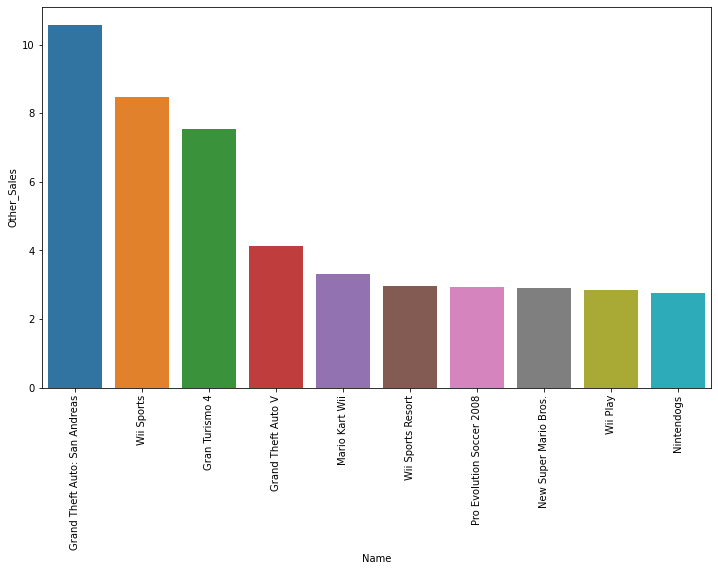

In [66]:
#기타지역 매출 Top10 게임
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(data = df.sort_values(by='Other_Sales', ascending=False).head(10), x = 'Name', y = 'Other_Sales');

북미, 일본, 유럽을 제외한 지역에서 가장 잘 팔린 게임은 GTA다. Wii Sports의 매출을 뛰어넘었다. Gran Turismo 도 잘 팔렸다. 포켓몬 시리즈보다 위 시리즈가 인기있었다는 점이 눈길을 끈다.

In [67]:
top100 = df.sort_values(by=["Sales_Sum"], ascending=False).head(100)  # 매출 탑 100위 정렬
top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,8.9575
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,7.8450
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58,7.57,1.8925
96,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,7.46,1.8650
97,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45,7.44,1.8600
98,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.37,7.38,1.8450


#개인적인 분석

## 게임 이름 Split 하여 빈도수, 매출 분석

In [68]:
# Too100 게임 제목 중 가장 자주 나오는 단어 구하기
import re
wordcount = {}
for words in top100['Name']:
  wordList = re.split('[\s:()&-]',words)
  for w in wordList:
    wordcount[w] = wordcount.get(w, 0) + 1  # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    keys = sorted(wordcount.keys())

word_df = pd.DataFrame.from_dict(wordcount, orient='index')
word_df = word_df.rename(columns ={0:'Count'})
word_df.sort_values(by='Count', ascending=False).iloc[1:].head(10)

,Count
Mario,23
Super,18
of,16
Duty,14
Call,14
2,12
Pokemon,10
Auto,9
Theft,9
Grand,9


매출순위 탑 100 안에 드는 게임들의 제목에서 가장 많이 나온 단어는 다음과 같다.
슈퍼 마리오, 콜 오브 듀티, 포켓몬과 Wii가 들어간 게임 제목이 많이 발매되었다.


In [69]:
# 매출 탑 1000위 게임 이름 분석
import re
top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000)
wordcount = {}
for words in top1000['Name']:
  wordList = re.split('[\s:()&-]',words)
  for w in wordList:
    wordcount[w] = wordcount.get(w, 0) + 1  # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    keys = sorted(wordcount.keys())

word_df = pd.DataFrame.from_dict(wordcount, orient='index').reset_index()
word_df = word_df.rename(columns ={0:'Count', 'index':'Word'})
word_df = word_df.sort_values(by='Count', ascending=False)
word_df = word_df[~word_df.Word.str.contains('of|The|the|for|&')] #전치사, 정관사 제외
# word_df = word_df.replace('II', '2').replace('III', '3').replace('IV', '4') #로마자 숫자로 교체
word_df.iloc[1:].head(25) # 맨 앞에 공백이 떠서 공백 없애주기

,Word,Count
49,2,85
3,Mario,66
42,3,58
2,Super,44
82,4,33
56,Call,30
58,Duty,30
135,Star,30
113,FIFA,30
70,II,30


매출 순위 탑 1000에 들어가는 게임 이름을 분석했을 때는

시리즈물에 들어가는 2,3,I,II,III,IV 등이 '마리오' 'FIFA', 콜오브듀티', '소닉' 보다 자주 사용된 점이 눈길을 끈다.

게임 제작사들이 시리즈물을 단독 게임보다 더 자주 발매한 것이다.
('마리오' 'FIFA', 콜오브듀티', '소닉' 등의 이름이 반복된다는 것이 시리즈물이 계속 만들어졌다는 뜻이다.)

Super, Mario, FIFA, Call of Duty, NFL, World, War 등의 단어가 포함된 게임도 많이 발매되었다.

**그렇다면 시리즈물은 다른 항목보다 매출이 높았을까?** 

빈출과 상위 매출이 동의어는 아니다.

게임 이름에 들어가는 단어별로 매출을 합산해보자.

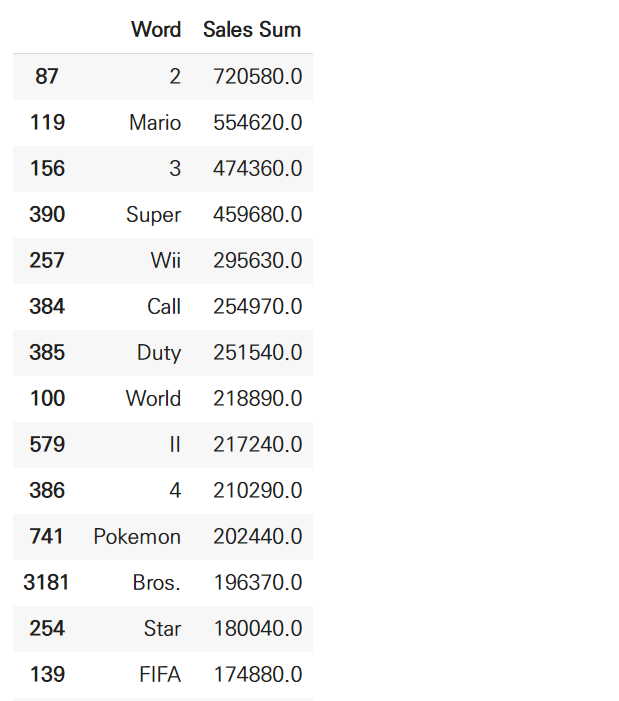

In [70]:
#돌리는데 2분 넘게 걸림 주의 >>>> 돌리는데 너무 시간이 걸려서 이미지 첨부로 대체합니다. 굳이 안 돌려도 되는 코드.
# # 단어별로 이름을 잘라 매출을 합산해보자
# import re
# # top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000) #매출 탑 1000 으로 돌려보기로.
# salecount = {}
# for i, words in enumerate(df['Name']): #전체데이터 기준
#   wordList = re.split('[\s:()&-]',words)
#   nowsum = df.iloc[i,-2].item() #매출 총액 가져오기
#   for w in wordList:
#     salecount[w] = salecount.get(w, 0) + nowsum  # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴, 뒤에 item()붙여 값만 가져옴
#     keys = sorted(salecount.keys())

# Sale_df = pd.DataFrame.from_dict(salecount, orient='index').reset_index()
# Sale_df = Sale_df.rename(columns ={0:'Sales Sum', 'index':'Word'})
# Sale_df = Sale_df.sort_values(by='Sales Sum', ascending=False)
# Sale_df = Sale_df[~Sale_df.Word.str.contains('of|The|the|for|&|and|no|to|-|in|sales|cs')] #전치사, 정관사 제외
# Sale_df.iloc[1:].head(25) # 맨 앞에 공백이 떠서 공백 없애주기

발매된 게임 이름에 들어가는 단어를 잘라 단어가 포함된 게임('콜 오브 듀티 2'의 매출이 8만 달러였다면 콜/오브/듀티/2 단어 각각에 8만 달러를 더해, 모든 게임들의 매출을 합산하였다.

즉 위 데이터프레임에 나오는 각 단어는, 각 단어가 포함된 게임들의 총매출이다.

2, 3, 4 ... 등 숫자가 들어간 시리즈 게임의 매출이 높은 건 알았으니(이름에 '2'가 포함된 게임들의 총 매출은 '마리오'를 포함한 게임의 매출보다 높았다),

숫자를 제외한 게임 이름을 분석해보자.

In [71]:
# 게임 이름에서 숫자가 들어가는 항목 제외
df[~df.Name.str.contains('1|2|3|4|5|I|II|III|IV|V')].sort_values(by='Sales_Sum', ascending=False).head(25)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,8.9575
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,7.8450
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26,7.5650
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01,7.5025
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,29.01,7.2525
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,28.61,7.1525
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31,7.0775


New 
Mario 
Pokemon Pokémon 
Call of Duty|Animal Crossing|Bros. 라는 이름으로도 시리즈가 나온다.

시리즈는 놀랍게도 숫자에만 있지 않았다...
이런 시리즈의 키워드도 다 빼 준다.

Wii는 플랫폼 이름이기도, 이 이름으로 시리즈가 나오기도 해서 뺄까 말까 애매했다.
Wii Sports와 Wii Play, Wii Fit, Wii Party는 https://en.wikipedia.org/wiki/Wii_(video_game_series) 기준으로 시리즈가 맞다고 판단, 해당 키워드로 빼 주었다. 

In [72]:
#애초에 숫자, 시리즈가 들어가는 이름을 제외하고 단어별 게임 매출 합산
onlyname_df = df[~df.Name.str.contains('1|2|3|4|5|6|7|9|9|0|I|II|III|IV|V|X|New|Mario|Pokemon|Pokémon|Call of Duty|Animal Crossing|Bros.|Grand Theft|Wii Sports|Wii Fit|Wii Party|Wii Play|Zelda')]

# 숫자를 제외한 게임 이름의 키워드별 매출 총액 
onlyname_df = onlyname_df.reset_index(drop=True).sort_values(by='Sales_Sum', ascending =False).reset_index(drop=True)
onlyname_df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
0,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26,7.5650
1,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31,7.0775
2,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,24.75,6.1875
3,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,21.82,5.4550
4,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,20.22,5.0550
5,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,10.95,2.7375
6,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88,9.87,2.4675
7,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30,9.30,2.3250
8,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20,9.20,2.3000
9,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81,7.81,1.9525


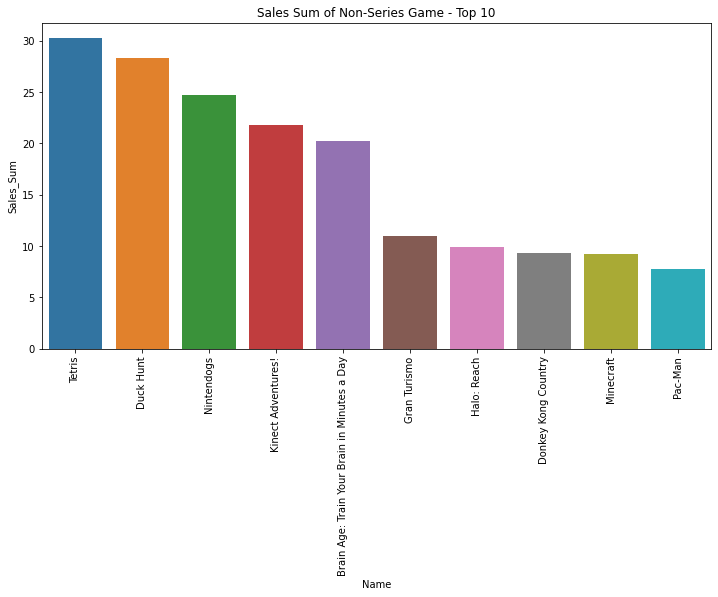

In [73]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title("Sales Sum of Non-Series Game - Top 10");
sns.barplot(data = onlyname_df.head(10), x = 'Name', y = 'Sales_Sum');


비 시리즈 게임 역대 매출 10위의 그래프이다.

In [74]:
# 시리즈 게임만 필터링
series_df = df[df.Name.str.contains('1|2|3|4|5|6|7|9|9|0|I|II|III|IV|V|X|New|Mario|Pokemon|Pokémon|Call of Duty|Animal Crossing|Bros.|Grand Theft|Wii Sports|Wii Fit|Wii Party|Wii Play|Zelda')]# 숫자, 시리즈 필터링

series_df = series_df.reset_index(drop=True).sort_values(by='Sales_Sum', ascending =False).reset_index(drop=True)
series_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum,Sales_Mean
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,8.9575
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,7.8450
...,...,...,...,...,...,...,...,...,...,...,...,...
6794,Super Robot Taisen XO,X360,2006,Strategy,Banpresto,0.00,0.00,0.01,0.00,0.01,0.01,0.0025
6795,Pachitte Chonmage Tatsujin 16: Pachinko Hissat...,PS2,2010,Misc,Hackberry,0.00,0.00,0.01,0.00,0.01,0.01,0.0025
6796,IL-2 Sturmovik,PC,2001,Simulation,Blue Byte,0.00,0.01,0.00,0.00,0.01,0.01,0.0025
6797,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,0.0025


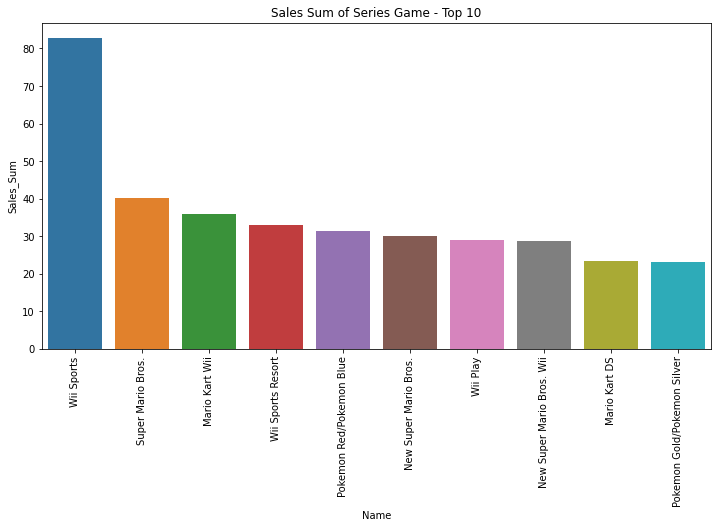

In [75]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title("Sales Sum of Series Game - Top 10");
sns.barplot(data = series_df.head(10), x = 'Name', y = 'Sales_Sum');

시리즈 게임 역대 매출 10위의 그래프이다.

### t-test

귀무가설 : 시리즈물과 비시리즈물 게임의 매출은 차이가 없을 것이다.

기각가설 : 시리즈물과 비시리즈물 게임의 매출은 차이가 있을 것이다. (다르다)

신뢰구간 : 95%
유의값 : 0.05

In [76]:
not_series_game = onlyname_df.Sales_Sum.iloc[:6785] # 시리즈가 아닌 게임 top 10의 매출 총액, 시리즈 게임과 개수를 맞춰준다.
series_game = series_df.Sales_Sum  # 시리즈 게임 top 10의 매출 총액

In [77]:
# 이름에 시리즈 숫자가 들어가는 게임과 일반 키워드의 매출 평균 비교
import scipy.stats as stats
stats.ttest_ind(series_game, not_series_game)

Ttest_indResult(statistic=6.0195879446785625, pvalue=1.7936760388947898e-09)

pvalue값이 유의값인 0.05 이하기 때문에 귀무가설을 기각한다.

시리즈물과 비시리즈물의 게임 매출은 차이가 있다.

statistic 값이 양수이므로, 시리즈 게임의 매출 평균이 더 크다.

In [78]:
# 시리즈 게임의 매출 Top 10의  통계 정보
series_df.head(10).describe().iloc[:,1:-1] 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,17.225000,10.462000,5.333000,2.71400,35.734000,35.734000
std,10.235058,7.006051,2.299102,2.23743,17.307989,17.308624
min,9.000000,3.580000,2.930000,0.71000,23.100000,23.090000
25%,11.297500,7.187500,3.775000,1.23000,28.720000,28.710000
50%,14.310000,9.045000,4.415000,2.55500,30.690000,30.695000
75%,15.825000,10.565000,6.732500,2.94500,35.115000,35.122500
max,41.490000,29.020000,10.220000,8.46000,82.740000,82.740000


In [79]:
# 비 - 시리즈 게임의 매출 Top 10의  통계 정보
onlyname_df.head(10).describe().iloc[:,1:-1] 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Sum
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,10.719000,3.893000,1.647000,0.990000,17.251000,17.249000
std,8.247217,3.576684,1.741877,0.871856,8.748429,8.748412
min,4.020000,0.450000,0.000000,0.080000,7.810000,7.810000
25%,4.957500,1.777500,0.120000,0.482500,9.445000,9.442500
50%,7.155000,2.545000,1.105000,0.675000,15.585000,15.585000
75%,13.495000,4.672500,2.885000,1.447500,24.025000,24.017500
max,26.930000,11.000000,4.220000,2.750000,30.260000,30.260000


시리즈 게임의 평균과, 북미 지역 매출 평균이 더 높다. 

# 다음 분기에 만들 게임은?

장르 : 사격 + 시리즈 게임

타겟 : 북미

퍼블리셔 : EA, 닌텐도, 소니, 유비소프트 중 하나로 하되, 

플랫폼 : PS5, 닌텐도 스위치, 3DS로 만들어야 한다.